In [1]:
import pandas as pd
#import os
#import fnmatch
#from datetime import datetime
import re
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import SparsePCA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# filename = 'unfiltered_model_df.pickle'
# with open(filename, 'rb') as d:
#     model_df = pickle.load(d)

In [3]:
pickle_folder = '04302019_pickle/'

In [4]:
filename = 'hip_replacement_model_df.pickle'
with open(filename, 'rb') as d:
    model_df = pickle.load(d)

# reset index for filtered df
model_df.index = list(range(0,(model_df.shape[0])))

In [5]:
model_df.tail()

,clm_id,desynpuf_id,sample_number,clm_start_year,clm_start_month,clm_start_day,clm_from_datetime,clm_utlztn_day_cnt,clm_utlztn_day_cnt_grouped,prvdr_num,...,benres_car_2010,pppymt_car_2010,chronic_condition_count_2010,collapsed_states,collapsed_counties,death_date,death_month,death_year,death_day,death_before_claim_ind
5587,45741150084575,FF8147E77498A754,2,2009,7,24,2009-07-24,3.0,0-3 days,45058P,...,940.0,0.0,11.0,45.0,653.0,NaT,NaN,NaN,NaN,0
5588,45251150066581,FF85972E96F9FE4F,2,2008,11,10,2008-11-10,6.0,4-7 days,6700SA,...,0.0,0.0,8.0,45.0,670.0,NaT,NaN,NaN,NaN,0
5589,45281150101007,FF85972E96F9FE4F,2,2010,1,25,2010-01-25,0.0,0-3 days,4502ZB,...,0.0,0.0,8.0,45.0,670.0,NaT,NaN,NaN,NaN,0
5590,45431150053234,FFB3E467A295008B,2,2010,8,31,2010-08-31,4.0,4-7 days,35T0KK,...,780.0,0.0,8.0,35.0,170.0,NaT,NaN,NaN,NaN,0
5591,45391150053616,FFF0A562C99579F7,2,2009,2,26,2009-02-26,3.0,0-3 days,4400WA,...,120.0,60.0,10.0,44.0,320.0,NaT,NaN,NaN,NaN,0


In [6]:
model_df.describe()

,clm_id,clm_start_year,clm_start_month,clm_start_day,clm_utlztn_day_cnt,at_physn_npi,clm_pmt_amt,sp_state_code_2008,bene_county_cd_2008,bene_death_dt_2008,...,benres_op_2010,pppymt_op_2010,medreimb_car_2010,benres_car_2010,pppymt_car_2010,chronic_condition_count_2010,death_month,death_year,death_day,death_before_claim_ind
count,5.592000e+03,5592.000000,5592.000000,5592.000000,5592.000000,5.542000e+03,5592.000000,5592.000000,5592.000000,1.600000e+01,...,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,154.000000,154.000000,154.0,5592.0
mean,1.212716e+14,2008.820279,6.303469,15.767167,3.939735,5.053263e+09,11953.472818,26.076001,382.399320,2.008088e+07,...,190.641304,21.452899,1498.173913,425.266304,23.121377,7.837500,6.857143,2009.428571,1.0,0.0
std,7.550651e+13,0.775956,3.321340,8.818900,2.797995,2.930592e+09,5118.846799,14.808880,271.456317,2.620433e+02,...,366.423914,340.304093,1123.097178,325.589548,87.611621,2.092586,3.189912,0.675018,0.0,0.0
min,4.501115e+13,2007.000000,1.000000,1.000000,0.000000,3.213682e+06,0.000000,1.000000,0.000000,2.008050e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2008.000000,1.0,0.0
25%,4.550115e+13,2008.000000,4.000000,8.000000,3.000000,2.482526e+09,10000.000000,13.000000,150.000000,2.008060e+07,...,0.000000,0.000000,650.000000,180.000000,0.000000,6.000000,4.250000,2009.000000,1.0,0.0
50%,1.960112e+14,2009.000000,6.000000,16.000000,3.000000,4.971603e+09,11000.000000,26.000000,340.000000,2.008090e+07,...,30.000000,0.000000,1280.000000,360.000000,0.000000,8.000000,7.000000,2010.000000,1.0,0.0
75%,1.965012e+14,2009.000000,9.000000,23.000000,4.000000,7.708360e+09,13000.000000,38.000000,580.000000,2.008110e+07,...,220.000000,0.000000,2150.000000,620.000000,0.000000,9.000000,9.000000,2010.000000,1.0,0.0
max,1.969912e+14,2010.000000,12.000000,31.000000,70.000000,9.999035e+09,57000.000000,54.000000,999.000000,2.008120e+07,...,5520.000000,14000.000000,7630.000000,2110.000000,1200.000000,11.000000,12.000000,2010.000000,1.0,0.0


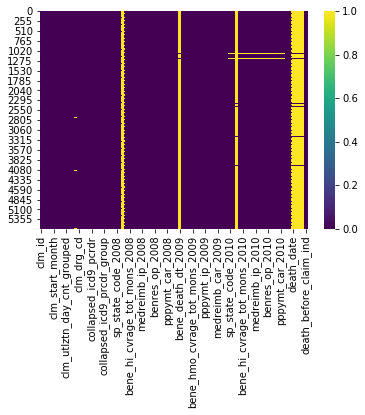

In [7]:
sns.heatmap(model_df.isnull(),cmap = 'viridis')

In [8]:
print(model_df.columns)

cluster_cat_cols = ['bene_sex_ident_cd',
                    'bene_race_cd',
                    'clm_start_year',
                    'clm_start_month',
                    'clm_utlztn_day_cnt_grouped',
                    'bene_esrd_ind_2008', 
                    'bene_esrd_ind_2009',
                    'bene_esrd_ind_2010'
                    #,'death_year'
                   ] # cat

state_county_cols = ['collapsed_states', # cat
                     'collapsed_counties']


cluster_num_cols = [ 
                'clm_pmt_amt', 
                'bene_hi_cvrage_tot_mons_2008', 
                'bene_smi_cvrage_tot_mons_2008', 
                'bene_hmo_cvrage_tot_mons_2008',
                'plan_cvrg_mos_num_2008', 
                'medreimb_ip_2008', 
                'benres_ip_2008',
                'pppymt_ip_2008', 
                'medreimb_op_2008', 
                'benres_op_2008',
                'pppymt_op_2008', 
                'medreimb_car_2008', 
                'benres_car_2008',
                'pppymt_car_2008', 
                'chronic_condition_count_2008', 
                'bene_hi_cvrage_tot_mons_2009', 
                'bene_smi_cvrage_tot_mons_2009',
                'bene_hmo_cvrage_tot_mons_2009', 
                'plan_cvrg_mos_num_2009',
                'medreimb_ip_2009', 
                'benres_ip_2009', 
                'pppymt_ip_2009',
                'medreimb_op_2009', 
                'benres_op_2009', 
                'pppymt_op_2009',
                'medreimb_car_2009', 
                'benres_car_2009', 
                'pppymt_car_2009',
                'chronic_condition_count_2009', 
                'bene_hi_cvrage_tot_mons_2010', 
                'bene_smi_cvrage_tot_mons_2010',
                'bene_hmo_cvrage_tot_mons_2010', 
                'plan_cvrg_mos_num_2010',
                'medreimb_ip_2010', 
                'benres_ip_2010', 
                'pppymt_ip_2010',
                'medreimb_op_2010', 
                'benres_op_2010', 
                'pppymt_op_2010',
                'medreimb_car_2010', 
                'benres_car_2010', 
                'pppymt_car_2010',
                'chronic_condition_count_2010',
#                 'death_ind_2008', 
#                 'death_ind_2009',
#                 'death_ind_2010'
                ]

cluster_cols_to_expand = [#'collapsed_icd9_dgns_group',
                          'clm_drg_cd',
                          'collapsed_icd9_prcdr_group',
                          #'collapsed_physn_npi'
                         ]

Index(['clm_id', 'desynpuf_id', 'sample_number', 'clm_start_year',
       'clm_start_month', 'clm_start_day', 'clm_from_datetime',
       'clm_utlztn_day_cnt', 'clm_utlztn_day_cnt_grouped', 'prvdr_num',
       'prvdr_num_grp', 'at_physn_npi', 'clm_drg_cd', 'clm_drg_cd_grp',
       'clm_pmt_amt', 'collapsed_icd9_dgns', 'collapsed_icd9_pcrdr',
       'collapsed_hcpcs_cd', 'collapsed_physn_npi',
       'collapsed_icd9_dgns_group', 'collapsed_icd9_prcdr_group',
       'bene_birth_dt', 'bene_sex_ident_cd', 'bene_race_cd',
       'sp_state_code_2008', 'bene_county_cd_2008', 'bene_death_dt_2008',
       'bene_esrd_ind_2008', 'bene_hi_cvrage_tot_mons_2008',
       'bene_smi_cvrage_tot_mons_2008', 'bene_hmo_cvrage_tot_mons_2008',
       'plan_cvrg_mos_num_2008', 'medreimb_ip_2008', 'benres_ip_2008',
       'pppymt_ip_2008', 'medreimb_op_2008', 'benres_op_2008',
       'pppymt_op_2008', 'medreimb_car_2008', 'benres_car_2008',
       'pppymt_car_2008', 'chronic_condition_count_2008', 'sp_state_co

In [9]:
print(model_df.shape)
npi_col = model_df['collapsed_physn_npi']
prvdr_col = model_df['prvdr_num']
model_df = model_df[(cluster_cat_cols + cluster_num_cols + cluster_cols_to_expand + state_county_cols)]
model_df['collapsed_physn_npi'] = prvdr_col
model_df['prvdr_num'] = npi_col
print(model_df.shape)
model_df.dropna(inplace = True)
print(model_df.shape)
model_df.index = range(0,5520)
print(model_df.index)
model_df.head()

(5592, 85)
(5592, 57)
(5520, 57)
RangeIndex(start=0, stop=5520, step=1)


,bene_sex_ident_cd,bene_race_cd,clm_start_year,clm_start_month,clm_utlztn_day_cnt_grouped,bene_esrd_ind_2008,bene_esrd_ind_2009,bene_esrd_ind_2010,clm_pmt_amt,bene_hi_cvrage_tot_mons_2008,...,medreimb_car_2010,benres_car_2010,pppymt_car_2010,chronic_condition_count_2010,clm_drg_cd,collapsed_icd9_prcdr_group,collapsed_states,collapsed_counties,collapsed_physn_npi,prvdr_num
0,2,1,2008,7,4-7 days,0,0,0,10000.0,12,...,2270.0,520.0,0.0,4.0,510,815,5.0,660.0,0520ZS,5739551552.0 6610066590.0
1,2,1,2009,7,0-3 days,0,0,0,19000.0,12,...,3340.0,930.0,40.0,7.0,500,815,44.0,180.0,4402KJ,2405294311.0
2,1,1,2010,1,4-7 days,0,0,0,12000.0,12,...,2310.0,350.0,0.0,7.0,466,041 815,45.0,390.0,45076B,4037882287.0
3,1,1,2010,6,4-7 days,0,0,0,12000.0,12,...,990.0,280.0,0.0,8.0,500,815,38.0,250.0,3800BU,2950647400.0 1503449008.0
4,1,1,2010,2,0-3 days,0,Y,0,12000.0,12,...,720.0,130.0,0.0,8.0,475,815,4.0,110.0,0400AC,7707560070.0 1949223467.0


In [10]:
model_df.shape

(5520, 57)

In [11]:
%%time
# setup PCA X matrix for procedure and diagnosis codes
vec = CountVectorizer(min_df = 1, binary = True)
X_pcdr_dgns = pd.DataFrame()
for clst in cluster_cols_to_expand:
    x_temp = vec.fit_transform(model_df.loc[:,clst])
    print(clst, 'added features:', len(vec.get_feature_names()))
    x_temp = pd.DataFrame(x_temp.toarray())
    x_temp.columns = vec.get_feature_names()
    #print(vec.get_feature_names()[1:10])
    X_pcdr_dgns = pd.concat([X_pcdr_dgns, x_temp], axis=1)
print('X_pcdr_dgns', X_pcdr_dgns.shape)
print('X_pcdr_dgns index', X_pcdr_dgns.index)
filename = pickle_folder + 'X_pcdr_dgns.pickle'
pickle.dump(X_pcdr_dgns, open(filename,'wb'))


# setup PCA X matrix for state and county
X_state_county = pd.get_dummies(data = model_df[state_county_cols], 
                               drop_first = True)
print('X_state_county', X_state_county.shape)
print('X_state_county index', X_state_county.index)
filename = pickle_folder + 'X_state_county.pickle'
pickle.dump(X_state_county, open(filename,'wb'))


# setup PCA X matrix for cat columns
X_cat_columns = pd.get_dummies(data = model_df[cluster_cat_cols],
                              drop_first = True)
print('X_cat_columns', X_cat_columns.shape)
print('X_cat_columns index', X_cat_columns.index)
filename = pickle_folder + 'X_cat_columns.pickle'
pickle.dump(X_cat_columns, open(filename,'wb'))


# setup PCA X matrix for npi
vec = CountVectorizer(min_df = 10, binary = True)
X_npi_prvdr = vec.fit_transform(model_df['collapsed_physn_npi'])
print('collapsed_physn_npi added features:', len(vec.get_feature_names()))
X_npi_prvdr = pd.DataFrame(X_npi_prvdr.toarray())
X_npi_prvdr.columns = vec.get_feature_names()
#print(vec.get_feature_names()[1:10])
X_npi_prvdr = pd.concat([X_npi_prvdr, pd.get_dummies(data = model_df['prvdr_num'],
                                                         drop_first = True)], axis=1)
print('X_npi_prvdr', X_npi_prvdr.shape)
filename = pickle_folder + 'X_npi_prvdr.pickle'
pickle.dump(X_npi_prvdr, open(filename,'wb'))

clm_drg_cd added features: 127
collapsed_icd9_prcdr_group added features: 304
X_pcdr_dgns (5520, 431)
X_pcdr_dgns index RangeIndex(start=0, stop=5520, step=1)
X_state_county (5520, 245)
X_state_county index RangeIndex(start=0, stop=5520, step=1)
X_cat_columns (5520, 11)
X_cat_columns index RangeIndex(start=0, stop=5520, step=1)
collapsed_physn_npi added features: 118
X_npi_prvdr (5520, 3602)
Wall time: 550 ms


In [12]:
# def fit_minibatch_sparse_pca(n_comp, rand_nb, X_mat):
#     # execute sparse pca
#     t = SparsePCA(n_components = n_comp, alpha = .5, # controls sparsity
#                   normalize_components = True, 
#                   random_state = rand_nb, njobs = -1)
#     t.fit(X_mat)
#     X_trans = t.transform(X_mat)
#     print(X_trans.shape)
#     print(np.mean(t.components_ == 0))
#     return X_trans

In [13]:
def fit_sparse_pca(n_comp, rand_nb, alph, X_mat):
    # execute sparse pca
    t = SparsePCA(n_components = n_comp, alpha = alph, # controls sparsity
                  normalize_components = True, 
                  random_state = rand_nb, n_jobs = -1)
    X_trans = t.fit_transform(X_mat)
    print(X_trans.shape)
    print(np.mean(t.components_ == 0))
    return X_trans

In [22]:
def fit_pca(n_comp, rand_nb, X_mat):
    # execute sparse pca
    t = PCA(n_components = n_comp, random_state= rand_nb)
    X_trans = t.fit_transform(X_mat)
    print(t.explained_variance_ratio_.cumsum()[:(n_comp + 1)])
    print(X_trans.shape)
    print(np.mean(t.components_ == 0))
    return X_trans

In [23]:
mat_dict = dict({'num_cols': model_df[cluster_num_cols],
                 'npi_prvdr' : X_npi_prvdr, 
                 'cat' : X_cat_columns, 
                 'state_county': X_state_county, 
                 'prcdr_dgns': X_pcdr_dgns,
                 'cat_state_county': pd.concat([X_cat_columns, X_state_county], axis = 1),
                 'all_x': pd.concat([X_cat_columns, X_state_county, X_pcdr_dgns], axis = 1), #X_npi_prvdr, 
                 'all_x_w_num': pd.concat([X_cat_columns, X_state_county, X_pcdr_dgns, model_df[cluster_num_cols]], axis = 1) #X_npi_prvdr, 
                 })     

num_cols start ***************************
25
[0.15354938 0.2228035  0.28072857 0.33495536 0.38365125 0.42895453
 0.46627694 0.50186177 0.5330031  0.56052109 0.58525716 0.60947615
 0.63322453 0.65663894 0.67974094 0.70251501 0.72507462 0.747507
 0.76935743 0.79085278 0.8120831  0.8317589  0.85052211 0.86750459
 0.88279249]
(5520, 25)
0.0
04302019_pickle/num_cols_trans_pca.pickle


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


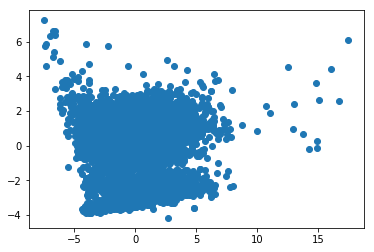

npi_prvdr start ***************************
100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.00055944 0.00111738 0.00167469 0.00223176 0.00278879 0.00334573
 0.00390259 0.00445941 0.00501617 0.0055729  0.00612956 0.0066861
 0.00724263 0.00779914 0.00835558 0.00891201 0.00946841 0.01002477
 0.01058112 0.01113746 0.01169375 0.01225004 0.01280627 0.0133625
 0.01391868 0.01447483 0.01503096 0.01558709 0.01614319 0.01669927
 0.01725535 0.01781139 0.0183674  0.01892341 0.01947939 0.02003535
 0.0205913  0.02114722 0.02170313 0.02225903 0.02281492 0.02337079
 0.02392664 0.02448248 0.02503831 0.02559413 0.02614993 0.02670572
 0.02726149 0.02781723 0.02837295 0.02892864 0.02948432 0.03003995
 0.03059556 0.03115114 0.03170667 0.03226217 0.03281766 0.03337312
 0.03392854 0.03448393 0.03503926 0.03559455 0.03614976 0.0367049
 0.03725998 0.03781496 0.0383698  0.03892456 0.0394793  0.04003398
 0.04058856 0.04114298 0.04169708 0.04225088 0.04280439 0.04335763
 0.04391081 0.04446378 0.04501626 0.04556844 0.04612027 0.04667203
 0.04722355 0.04777446 0.04832503 0.0488753  0.04942496 0.0499744

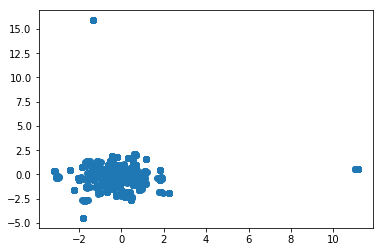

cat start ***************************
10
[0.12814407 0.23666358 0.33892225 0.435083   0.52821632 0.61812506
 0.70156083 0.7833115  0.86209033 0.93330803]
(5520, 10)
0.0
04302019_pickle/cat_trans_pca.pickle


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


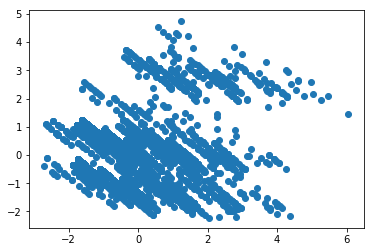

state_county start ***************************
100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.00714452 0.01411957 0.02094749 0.0275907  0.03414005 0.04060068
 0.04688752 0.05309043 0.05924316 0.06533899 0.07135888 0.07730125
 0.08318233 0.08900616 0.0947989  0.10057799 0.10623811 0.11186092
 0.11743471 0.12294475 0.12834372 0.13367239 0.13896619 0.14423202
 0.14944132 0.15461466 0.15978096 0.16489937 0.16992298 0.17491281
 0.17981081 0.1846758  0.18947419 0.19423705 0.19899044 0.20366104
 0.20831886 0.21294477 0.21750378 0.22204271 0.22655191 0.23101565
 0.23542759 0.2397979  0.24413601 0.24842258 0.25262105 0.25678857
 0.26092169 0.26504232 0.26915815 0.27327059 0.27738092 0.28148827
 0.28559374 0.28969782 0.29380056 0.29790253 0.30200407 0.30610444
 0.31020457 0.31430375 0.31840184 0.32249899 0.32659494 0.33069063
 0.3347837  0.33887624 0.34296784 0.34705856 0.35114895 0.3552381
 0.35932671 0.36341456 0.36750187 0.37158844 0.37567432 0.37975945
 0.38384424 0.38792827 0.3920115  0.39609356 0.4001744  0.40425413
 0.40833375 0.41240982 0.41648504 0.42055818 0.42462514 0.42868

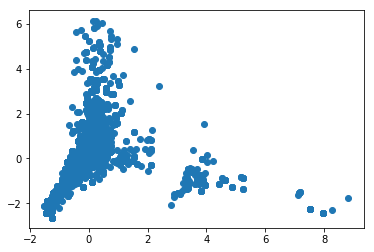

prcdr_dgns start ***************************
100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.0086027  0.01684016 0.02412661 0.03133014 0.03715577 0.04222746
 0.04724414 0.05214914 0.05699955 0.06180501 0.06652401 0.07102002
 0.07537747 0.07968006 0.08389241 0.08806118 0.0921809  0.09627252
 0.1003448  0.1043804  0.1084015  0.11232764 0.11617765 0.11999741
 0.12379861 0.12755624 0.13127788 0.13499329 0.13865494 0.14226875
 0.14585795 0.1494002  0.1529073  0.15639673 0.15987751 0.16335523
 0.16677984 0.17013988 0.1734844  0.17681758 0.18014692 0.18344139
 0.18669555 0.18993614 0.19315155 0.19636218 0.19956129 0.20272274
 0.20585969 0.20898218 0.21209632 0.21518147 0.21823603 0.22127998
 0.22432105 0.22734105 0.23035313 0.23335489 0.23634683 0.23932969
 0.2423042  0.24524745 0.24817544 0.25108866 0.25398018 0.25686244
 0.25972058 0.26257757 0.26543091 0.2682637  0.27109393 0.2739138
 0.27672582 0.27953137 0.28232025 0.28508914 0.2878492  0.29060507
 0.29334455 0.29607174 0.29879211 0.30150643 0.30421653 0.30691187
 0.3095997  0.31227174 0.31492237 0.31756589 0.32019893 0.32281

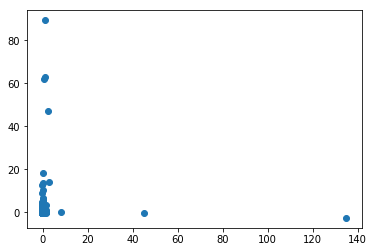

cat_state_county start ***************************
100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.00692639 0.01372731 0.0204358  0.02697047 0.03334384 0.0396054
 0.04569204 0.05172023 0.05764694 0.06357102 0.06938367 0.07515326
 0.08089563 0.08658085 0.09219188 0.09779461 0.10333613 0.10880106
 0.11422079 0.11957816 0.12488343 0.13008268 0.13524367 0.14036714
 0.14548641 0.15055165 0.15558834 0.16059214 0.16555587 0.17045388
 0.17525449 0.18003686 0.18477916 0.18950377 0.19419463 0.19883533
 0.20343715 0.20801064 0.21256862 0.21708339 0.22155572 0.22598254
 0.23037324 0.23470511 0.23899921 0.2432746  0.24753272 0.25177184
 0.2559799  0.26014487 0.26425062 0.26834825 0.27242514 0.27648565
 0.28051966 0.28452755 0.28850548 0.29248072 0.29642907 0.30036657
 0.30429816 0.30822808 0.31215503 0.31607955 0.32000321 0.32392538
 0.32784703 0.33176799 0.33568702 0.33960481 0.34352234 0.34743863
 0.35135322 0.35526688 0.3591803  0.36309208 0.36700263 0.37091258
 0.37482155 0.37872998 0.38263625 0.38654202 0.39044578 0.39434872
 0.39825022 0.40214858 0.40604594 0.40994217 0.4138363  0.41772

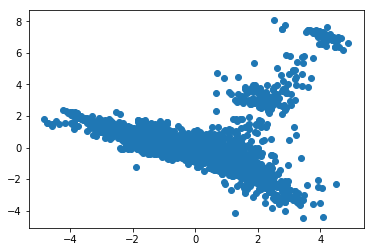

all_x start ***************************
100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.00553782 0.01081229 0.01545187 0.02001162 0.02371586 0.02717795
 0.03059365 0.03382005 0.03699229 0.04010265 0.04314377 0.04611035
 0.04906268 0.05196507 0.0548169  0.05763809 0.06045498 0.06323026
 0.06598364 0.06873079 0.07146009 0.0741603  0.07683006 0.0794845
 0.08212668 0.08476474 0.08737056 0.08996305 0.09254808 0.09508686
 0.09761149 0.1001254  0.10261346 0.10509406 0.10755666 0.10998856
 0.11241082 0.11482502 0.11723061 0.11963051 0.12201225 0.12438173
 0.12674288 0.12909589 0.13143772 0.13376156 0.13606737 0.13836286
 0.14064848 0.14292338 0.14518073 0.14742841 0.14966999 0.15190772
 0.15412096 0.1563247  0.15852424 0.1607132  0.16289643 0.16506126
 0.16721242 0.16936159 0.17150256 0.17363907 0.17575154 0.1778622
 0.17996454 0.1820621  0.18415407 0.18623959 0.18831663 0.19038082
 0.19243934 0.19449067 0.19653057 0.19856122 0.20058521 0.20259763
 0.2046007  0.20659548 0.20858228 0.21055913 0.21252654 0.21448871
 0.21644106 0.21839038 0.22032736 0.22225106 0.22416787 0.226079

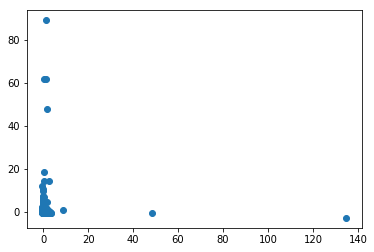

all_x_w_num start ***************************
100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.01002607 0.01524685 0.02027603 0.02477252 0.02913346 0.03344438
 0.03766877 0.04128591 0.04481347 0.04821634 0.05150076 0.05469183
 0.05786003 0.06088429 0.06386431 0.06679275 0.06964815 0.07245034
 0.07522942 0.07796554 0.08064453 0.08330993 0.08595027 0.08857974
 0.09118388 0.09377974 0.09635023 0.09891063 0.10145016 0.10397576
 0.10647887 0.10896857 0.11144154 0.11386722 0.11629259 0.11870787
 0.12110019 0.12347208 0.12582529 0.12816685 0.13048891 0.13279874
 0.13508909 0.1373719  0.13964945 0.14190651 0.14415793 0.14638938
 0.14861437 0.15082373 0.15302767 0.15522382 0.15740896 0.15957937
 0.16174018 0.16388898 0.16603379 0.16816254 0.17028625 0.17239482
 0.1744965  0.17659752 0.17868014 0.18075502 0.18282437 0.18488437
 0.18693376 0.1889653  0.19098943 0.19300266 0.19500991 0.19700543
 0.19898982 0.2009657  0.20293852 0.20490761 0.20686115 0.20880511
 0.21074017 0.21267089 0.21459393 0.21650839 0.21841145 0.22031068
 0.22219737 0.22406865 0.2259307  0.22778829 0.22964523 0.2314

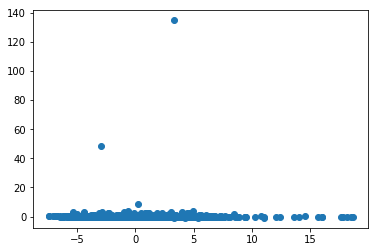

Wall time: 10.8 s


In [24]:
%%time
models_pca = dict()
for k in list(mat_dict.keys()):
    if k in ['num_cols']:
        n = 25
    elif k in ['cat']:
        n = 10
    else:
        n = 100
    print(k + ' start ***************************')
    print(n)
    X = StandardScaler().fit_transform(mat_dict[k])
    x_trans = fit_pca(n, 42, X) #
    models_pca[k] = x_trans
    filename = pickle_folder + k + '_trans_pca.pickle'
    pickle.dump(x_trans, open(filename,'wb'))
    print(filename)
#     print(x_trans[:,0])
#     print(x_trans[:,1])
    plt.scatter(x = x_trans[:,0], y = x_trans[:,1])
    plt.show()

In [25]:
%%time
models_sparse_pca = dict()
for k in list(mat_dict.keys()):
    x_trans = fit_sparse_pca(3, 42, .4, mat_dict[k])
    models_sparse_pca[k] = x_trans
    filename = pickle_folder + k + '_trans_sparse_pca.pickle'
    pickle.dump(x_trans, open(filename,'wb'))
    print(filename)

(5520, 3)
0.031007751937984496
04302019_pickle/num_cols_trans_sparse_pca.pickle
(5520, 3)
0.9993522117342217
04302019_pickle/npi_prvdr_trans_sparse_pca.pickle
(5520, 3)
0.5757575757575758
04302019_pickle/cat_trans_sparse_pca.pickle
(5520, 3)
0.9142857142857143
04302019_pickle/state_county_trans_sparse_pca.pickle
(5520, 3)
0.9945862335653519
04302019_pickle/prcdr_dgns_trans_sparse_pca.pickle
(5520, 3)
0.97265625
04302019_pickle/cat_state_county_trans_sparse_pca.pickle
(5520, 3)
0.9893255701115963
04302019_pickle/all_x_trans_sparse_pca.pickle
(5520, 3)
0.9296803652968036
04302019_pickle/all_x_w_num_trans_sparse_pca.pickle
Wall time: 1min 2s


In [28]:
filename = pickle_folder + 'cat_state_county_trans_pca.pickle'
with open(filename, 'rb') as d:
    cat_state_county_pca = pickle.load(d)
    
filename = pickle_folder + 'npi_prvdr_trans_pca.pickle'
with open(filename, 'rb') as d:
    npi_prvdr_pca = pickle.load(d)
    
filename = pickle_folder + 'all_x_trans_pca.pickle'
with open(filename, 'rb') as d:
    all_x_pca = pickle.load(d)
    
filename = pickle_folder + 'all_x_w_num_trans_pca.pickle'
with open(filename, 'rb') as d:
    all_x_w_num_pca = pickle.load(d) 
    
    
filename = pickle_folder + 'all_x_w_num_trans_sparse_pca.pickle'
with open(filename, 'rb') as d:
    all_x_w_num_trans_sparse_pca = pickle.load(d) 

In [30]:
# add some keys to the dict list
mat_dict = dict({
                'num_cols': model_df[cluster_num_cols],
                 'npi_prvdr' : X_npi_prvdr, 
                 'cat' : X_cat_columns, 
                 'state_county': X_state_county, 
                 'prcdr_dgns': X_pcdr_dgns,
                 'cat_state_county': pd.concat([X_cat_columns, X_state_county], axis = 1),
                 'all_x': pd.concat([X_npi_prvdr, X_cat_columns, X_state_county, X_pcdr_dgns], axis = 1),
                 'all_x_w_num': pd.concat([X_npi_prvdr, X_cat_columns, X_state_county, X_pcdr_dgns, model_df[cluster_num_cols]], axis = 1),
                 'all_x_pca': all_x_pca,
                 'all_x_w_num_pca': all_x_w_num_pca,
                 'all_x_pca_w_num': pd.concat([pd.DataFrame(all_x_pca), model_df[cluster_num_cols]], axis = 1),
                 'all_x_w_num_trans_sparse_pca' : all_x_w_num_trans_sparse_pca,
                 'cat_state_county_pca' : cat_state_county_pca,
                 'npi_prvdr_pca': npi_prvdr_pca,
                 'pca_w_raw_pcdr_dgns':pd.concat([pd.DataFrame(cat_state_county_pca), pd.DataFrame(npi_prvdr_pca), X_pcdr_dgns], axis = 1),
                 'pca_w_raw_pcdr_dgns_w_num_pca':pd.concat([model_df[cluster_num_cols], pd.DataFrame(cat_state_county_pca), pd.DataFrame(npi_prvdr_pca), X_pcdr_dgns], axis = 1)
                }) 

In [35]:
%%time
db_list = []
models_dbscan = dict()
for k in list(mat_dict.keys()):
    for mtr in ['l1','euclidean','cosine','hamming']: 
        print(mtr)
        X = StandardScaler().fit_transform(mat_dict[k])
        try:
            db = DBSCAN(n_jobs = -1, metric = mtr).fit(X)
            filename = pickle_folder + 'dbscan_pca_{}_{}.pickle'.format(mtr, k)
            db_list.append(filename)
            pickle.dump(db, open(filename,'wb'))
            print(mtr + ' '+ k +' complete')
        except:
            print(mtr + ' '+ k +' ERRORED OUT')

l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 num_cols complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean num_cols complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cosine num_cols complete
hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


hamming num_cols complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 npi_prvdr complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean npi_prvdr complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cosine npi_prvdr complete
hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


hamming npi_prvdr complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 cat complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean cat complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cosine cat complete
hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


hamming cat complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 state_county complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean state_county complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype 

cosine state_county ERRORED OUT
hamming
hamming state_county complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 prcdr_dgns complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean prcdr_dgns complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cosine prcdr_dgns complete
hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


hamming prcdr_dgns complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 cat_state_county complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean cat_state_county complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: D

cosine cat_state_county ERRORED OUT
hamming
hamming cat_state_county complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 all_x complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean all_x complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cosine all_x complete
hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


hamming all_x complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 all_x_w_num complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean all_x_w_num complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cosine all_x_w_num complete
hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


hamming all_x_w_num complete
l1
l1 all_x_pca complete
euclidean
euclidean all_x_pca complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))


cosine all_x_pca ERRORED OUT
hamming
hamming all_x_pca complete
l1
l1 all_x_w_num_pca complete
euclidean
euclidean all_x_w_num_pca complete
cosine
cosine all_x_w_num_pca complete
hamming
hamming all_x_w_num_pca complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 all_x_pca_w_num complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean all_x_pca_w_num complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarn

cosine all_x_pca_w_num ERRORED OUT
hamming
hamming all_x_pca_w_num complete
l1
l1 all_x_w_num_trans_sparse_pca complete
euclidean
euclidean all_x_w_num_trans_sparse_pca complete
cosine
cosine all_x_w_num_trans_sparse_pca complete
hamming
hamming all_x_w_num_trans_sparse_pca complete
l1
l1 cat_state_county_pca complete
euclidean
euclidean cat_state_county_pca complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))


cosine cat_state_county_pca ERRORED OUT
hamming
hamming cat_state_county_pca complete
l1
l1 npi_prvdr_pca complete
euclidean
euclidean npi_prvdr_pca complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))


cosine npi_prvdr_pca ERRORED OUT
hamming
hamming npi_prvdr_pca complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 pca_w_raw_pcdr_dgns complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean pca_w_raw_pcdr_dgns complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarn

cosine pca_w_raw_pcdr_dgns ERRORED OUT
hamming
hamming pca_w_raw_pcdr_dgns complete
l1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


l1 pca_w_raw_pcdr_dgns_w_num_pca complete
euclidean


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


euclidean pca_w_raw_pcdr_dgns_w_num_pca complete
cosine


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\disk.py:122: UserWarning: Unable to delete folder C:\Users\598300\AppData\Local\Temp\joblib_memmapping_folder_11848_4615475955 after 5 tentatives.
  .format(folder_path, RM_SUBDIRS_N_RETRY))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarn

cosine pca_w_raw_pcdr_dgns_w_num_pca ERRORED OUT
hamming
hamming pca_w_raw_pcdr_dgns_w_num_pca complete
Wall time: 8min 46s


'cosine'